In [1]:
import imageio
import tifffile
import numpy as np
from scipy.signal import lfilter
import os
import time

In [2]:
def read_tif_stack(filename):
    """Reads a .tif image stack into a 3D NumPy array.

    Args:
        filename: The path to the .tif file.

    Returns:
        A 3D NumPy array containing the image stack.
    """

    with tifffile.TiffFile(filename) as tif:
        return tif.asarray()

In [3]:
def kalman_filter(data, R, Q):
    """Performs Kalman filtering on a 1D signal.

    Args:
        data: The input 1D signal.
        R: The measurement noise covariance.
        Q: The process noise covariance (prediction bias).

    Returns:
        The filtered signal.
    """

    x_hat = data[0]  # Initial state estimate
    P = 1  # Initial error covariance

    filtered_data = [x_hat]

    for z in data[1:]:
        # Prediction
        x_hat_minus = Q * x_hat
        P_minus = Q * P * Q + R

        # Update
        K = P_minus / (P_minus + R)
        x_hat = x_hat_minus + K * (z - x_hat_minus)
        P = (1 - K) * P_minus

        filtered_data.append(x_hat)

    return np.array(filtered_data)

In [4]:
def apply_kalman_to_stack(stack, R, Q):
    """Applies the Kalman filter to each pixel in the image stack.

    Args:
        stack: The 3D image stack.
        R: The measurement noise covariance.
        Q: The process noise covariance (prediction bias).

    Returns:
        The filtered image stack.
    """

    filtered_stack = np.zeros_like(stack)
    
    start_time = time.time()
    
    for i in range(int(stack.shape[1]/4)):
        print(f"Filtering #{i} of {stack.shape[1]} in X")
        for j in range(int(stack.shape[2]/4)):
            # print(f"Filtering #{i} of {stack.shape[1]} in X and #{j} of {stack.shape[2]} in Y")
            filtered_stack[:, i, j] = kalman_filter(stack[:, i, j], R, Q)
            
        end_time = time.time()

        elapsed_time = end_time - start_time
        print("Elapsed time:", elapsed_time, "seconds")

    return filtered_stack

In [5]:
# if __name__ == "__main__":

root = "C:\\Users\\svw191\\PythonFiles\\PythonTrial\\LED +APs 240926\\240926_pl100_pc001_LED+APs500microW_ex01\\DATA\\ChanB"
filename = "ChanB_stk.tif"
# stack = read_tif_stack(os.path.join(root,filename))

tif_stk = read_tif_stack(os.path.join(root, filename))
print(np.shape(tif_stk))

R = 0.05  # Measurement noise variance
Q = 0.80  # Process noise covariance (prediction bias)

start_time_2 = time.time()
                
print("Initiating Kalman Filtering...")
filtered_stack = apply_kalman_to_stack(tif_stk, R, Q)

print("Kalman filtering complete")
end_time_2 = time.time()

elapsed_time_2 = end_time_2 - start_time_2
print("Elapsed time:", elapsed_time_2, "seconds")

AVG_KM_tif_stk = np.mean(filtered_stack, axis=0)

# Write the stacked image to a new .tif file
tifffile.imwrite(os.path.join(root, "AVG_KM_tif_stk.tif"), AVG_KM_tif_stk)

(2950, 512, 512)
Initiating Kalman Filtering...
Filtering #0 of 512 in X
Elapsed time: 0.9034361839294434 seconds
Filtering #1 of 512 in X
Elapsed time: 1.7189247608184814 seconds
Filtering #2 of 512 in X
Elapsed time: 2.5287861824035645 seconds
Filtering #3 of 512 in X
Elapsed time: 3.34533429145813 seconds
Filtering #4 of 512 in X
Elapsed time: 4.183788299560547 seconds
Filtering #5 of 512 in X
Elapsed time: 6.6029908657073975 seconds
Filtering #6 of 512 in X
Elapsed time: 9.072184801101685 seconds
Filtering #7 of 512 in X
Elapsed time: 11.54669189453125 seconds
Filtering #8 of 512 in X
Elapsed time: 14.256441831588745 seconds
Filtering #9 of 512 in X
Elapsed time: 16.976170778274536 seconds
Filtering #10 of 512 in X
Elapsed time: 19.50967812538147 seconds
Filtering #11 of 512 in X
Elapsed time: 22.019830465316772 seconds
Filtering #12 of 512 in X
Elapsed time: 24.601015090942383 seconds
Filtering #13 of 512 in X
Elapsed time: 27.097968578338623 seconds
Filtering #14 of 512 in X
Elap

Elapsed time: 306.28308486938477 seconds
Filtering #123 of 512 in X
Elapsed time: 308.75446915626526 seconds
Filtering #124 of 512 in X
Elapsed time: 311.2430076599121 seconds
Filtering #125 of 512 in X
Elapsed time: 313.7663130760193 seconds
Filtering #126 of 512 in X
Elapsed time: 316.42706537246704 seconds
Filtering #127 of 512 in X
Elapsed time: 318.8655128479004 seconds
Kalman filtering complete
Elapsed time: 319.06539249420166 seconds


In [9]:
np.shape(AVG_KM_tif_stk)

(512, 512)

In [8]:
tifffile.imwrite(os.path.join(root, "AVG_KM_tif_stk.tif"), AVG_KM_tif_stk)

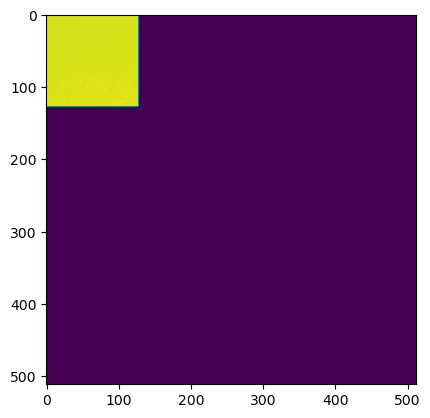

In [12]:
# check out the array

import matplotlib.pyplot as plt
plt.imshow(AVG_KM_tif_stk)